# ATP Tennis Data - 1985 to 2018 with matchup


In this dataset, we are going to run our models with data dating back to 1985 to see if more data actually helps with our predictions.

### Results that did the best model (history diff)

```
Model Score: 0.6906819716407833

ROC/AUC Score: 0.6906426130517523
              precision    recall  f1-score   support

        Loss       0.69      0.68      0.69      7381
         Win       0.69      0.70      0.70      7429

    accuracy                           0.69     14810
   macro avg       0.69      0.69      0.69     14810
weighted avg       0.69      0.69      0.69     14810
```

# Summary of Results

This actually brought down our accuracy quite a bit suggesting that match behavior is changing over time as later matches may be better predictors of our outcome

```
Model Score: 0.6690823190262652

ROC/AUC Score: 0.669077794849172
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976
```



# Already ran this notebook

Found that adding more history data doesn't help our models. Going to throw an exception here so when I re-run all notebooks from command line it will skip this one and not overwrite the cell values

In [ ]:
raise Exception("Don't run this!")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, RSTATE, N_JOBS, MAX_ITER, LABEL_COL

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "ohe-matchup_diff-1985"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-ohe-history5-matchup5-stats5.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"

else:
    # update this
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-ohe-history5-matchup5-stats5.csv'

START_YEAR = 1985
END_YEAR = 2018




In [3]:
import re

def filter_features(data: pd.DataFrame):
    history_columns = [col for col in data.columns if re.search('history', col)]
    print(f'Before: data.shape {data.shape}')
    data = data.drop(history_columns, axis=1)

    # drop all columns that doesn't have diff
    matchup_columns = [col for col in data.columns if re.search('matchup', col) and not re.search('diff', col)]
    data = data.drop(matchup_columns, axis=1)
    

    stats_columns = [col for col in data.columns if re.search("stats", col)]
    data = data.drop(stats_columns, axis=1)



    print(f'After: data.shape {data.shape}')
    
    return data


Before: data.shape (74925, 5299)
After: data.shape (74925, 5260)
Before: data.shape (24976, 5299)
After: data.shape (24976, 5260)


In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR, data_filter = feature_filter)

Our dataset actually has both historical data as well as matchup data. We will remove the matchup columns from the dataset

In [4]:
[col for col in X_train.columns if re.search('matchup', col)]

['p1_matchup_wins_diff', 'p1_matchup_games_diff', 'p1_matchup_sets_diff']

# Logistic Regression

In [5]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6577514413837284

ROC/AUC Score: 0.6577665640254107
              precision    recall  f1-score   support

        Loss       0.66      0.65      0.66     12522
         Win       0.65      0.66      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8167  4355
Win   4193  8261


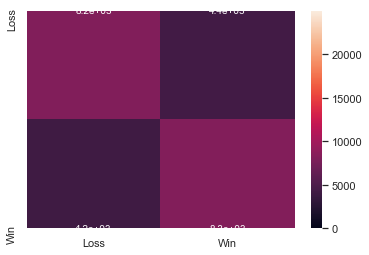

In [6]:
lr.analyze()

In [7]:
# ju.plot_2d(X_test, y_predict_lr)

In [8]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [9]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_knn = knn.predict()

Model Score: 0.6026185137732223

ROC/AUC Score: 0.6026167672213429
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60     12522
         Win       0.60      0.60      0.60     12454

    accuracy                           0.60     24976
   macro avg       0.60      0.60      0.60     24976
weighted avg       0.60      0.60      0.60     24976

      Loss   Win
Loss  7554  4968
Win   4957  7497


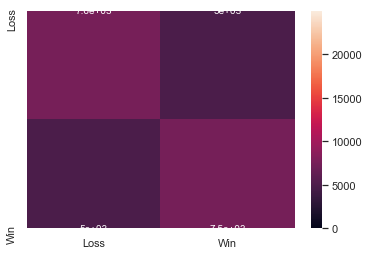

In [10]:
knn.analyze()

In [11]:
# ju.plot_2d(X_test, y_predict_knn)

In [12]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [13]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_dt = dt.predict()

Model Score: 0.5978539397821909

ROC/AUC Score: 0.5978553192021997
              precision    recall  f1-score   support

        Loss       0.60      0.60      0.60     12522
         Win       0.60      0.60      0.60     12454

    accuracy                           0.60     24976
   macro avg       0.60      0.60      0.60     24976
weighted avg       0.60      0.60      0.60     24976

      Loss   Win
Loss  7480  5042
Win   5002  7452


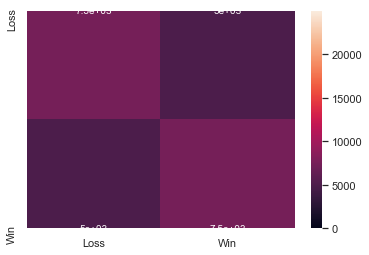

In [14]:
dt.analyze()

In [15]:
# ju.plot_2d(X_test, y_predict_dt)

In [16]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [17]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   15.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


Model Score: 0.6295243433696348

ROC/AUC Score: 0.6293215637923857
              precision    recall  f1-score   support

        Loss       0.61      0.70      0.66     12522
         Win       0.65      0.55      0.60     12454

    accuracy                           0.63     24976
   macro avg       0.63      0.63      0.63     24976
weighted avg       0.63      0.63      0.63     24976

      Loss   Win
Loss  8813  3709
Win   5544  6910


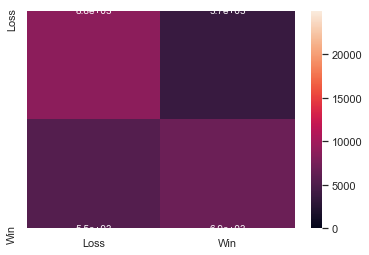

In [18]:
rf.analyze()

In [19]:
# ju.plot_2d(X_test, y_predict_rf)

In [20]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [21]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3669           21.18m
         2           1.3509           20.84m
         3           1.3368           20.68m
         4           1.3251           20.42m
         5           1.3144           20.19m
         6           1.3053           19.87m
         7           1.2981           19.60m
         8           1.2909           19.30m
         9           1.2848           19.03m
        10           1.2794           18.98m
        20           1.2490           17.58m
        30           1.2300           15.31m
        40           1.2166           13.08m
        50           1.2084           10.78m
        60           1.2019            8.53m
        70           1.1976            6.38m
        80           1.1957            4.21m


Model Score: 0.6690823190262652

ROC/AUC Score: 0.669077794849172
              precision    recall  f1-score   support

        Loss       0.67      0.67      0.67     12522
         Win       0.67      0.67      0.67     12454

    accuracy                           0.67     24976
   macro avg       0.67      0.67      0.67     24976
weighted avg       0.67      0.67      0.67     24976

      Loss   Win
Loss  8399  4123
Win   4142  8312


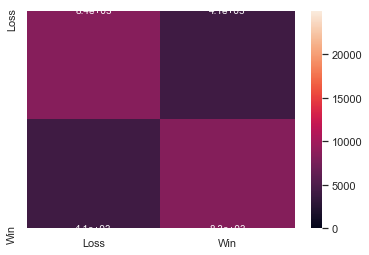

In [22]:
gb.analyze()

In [23]:
# ju.plot_2d(X_test, y_predict_gb)

In [24]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [25]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test, data_filter = feature_filter).fit()
y_predict_ab = ab.predict()

Model Score: 0.6566303651505445

ROC/AUC Score: 0.6566343604615119
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66     12522
         Win       0.65      0.66      0.66     12454

    accuracy                           0.66     24976
   macro avg       0.66      0.66      0.66     24976
weighted avg       0.66      0.66      0.66     24976

      Loss   Win
Loss  8204  4318
Win   4258  8196


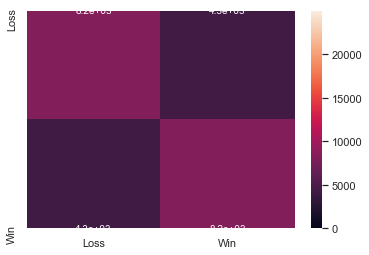

In [26]:
ab.analyze()

In [27]:
# ju.plot_2d(X_test, y_predict_ab)

In [28]:
ab.save()

Saving report: ../reports/summary.csv


# Results

In [29]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report.tail(6)

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
108,LogisticRegression,ohe-matchup_diff-1985,../datasets/atp_matches_1985-2019_features-ohe...,1985,2018,0.657751,0.657767,"{""0"": {""0"": 8167, ""1"": 4193}, ""1"": {""0"": 4355,...","{""Loss"": {""precision"": 0.6607605177993527, ""re...",../models/logisticregression-1985-2018-ohe-mat...,0.0,0.0,0.0
109,KNeighborsClassifier,ohe-matchup_diff-1985,../datasets/atp_matches_1985-2019_features-ohe...,1985,2018,0.602619,0.602617,"{""0"": {""0"": 7554, ""1"": 4957}, ""1"": {""0"": 4968,...","{""Loss"": {""precision"": 0.603788665973943, ""rec...",../models/kneighborsclassifier-1985-2018-ohe-m...,1.0,0.0,1.0
110,DecisionTreeClassifier,ohe-matchup_diff-1985,../datasets/atp_matches_1985-2019_features-ohe...,1985,2018,0.597854,0.597855,"{""0"": {""0"": 7480, ""1"": 5002}, ""1"": {""0"": 5042,...","{""Loss"": {""precision"": 0.5992629386316295, ""re...",../models/decisiontreeclassifier-1985-2018-ohe...,0.0,0.0,0.0
111,RandomForestClassifier,ohe-matchup_diff-1985,../datasets/atp_matches_1985-2019_features-ohe...,1985,2018,0.629524,0.629322,"{""0"": {""0"": 8813, ""1"": 5544}, ""1"": {""0"": 3709,...","{""Loss"": {""precision"": 0.613846903949293, ""rec...",../models/randomforestclassifier-1985-2018-ohe...,0.0,0.0,0.0
112,GradientBoostingClassifier,ohe-matchup_diff-1985,../datasets/atp_matches_1985-2019_features-ohe...,1985,2018,0.669082,0.669078,"{""0"": {""0"": 8399, ""1"": 4142}, ""1"": {""0"": 4123,...","{""Loss"": {""precision"": 0.669723307551232, ""rec...",../models/gradientboostingclassifier-1985-2018...,0.0,18.0,18.0
113,AdaBoostClassifier,ohe-matchup_diff-1985,../datasets/atp_matches_1985-2019_features-ohe...,1985,2018,0.656630,0.656634,"{""0"": {""0"": 8204, ""1"": 4258}, ""1"": {""0"": 4318,...","{""Loss"": {""precision"": 0.6583212967420959, ""re...",../models/adaboostclassifier-1985-2018-ohe-mat...,0.0,2.0,2.0


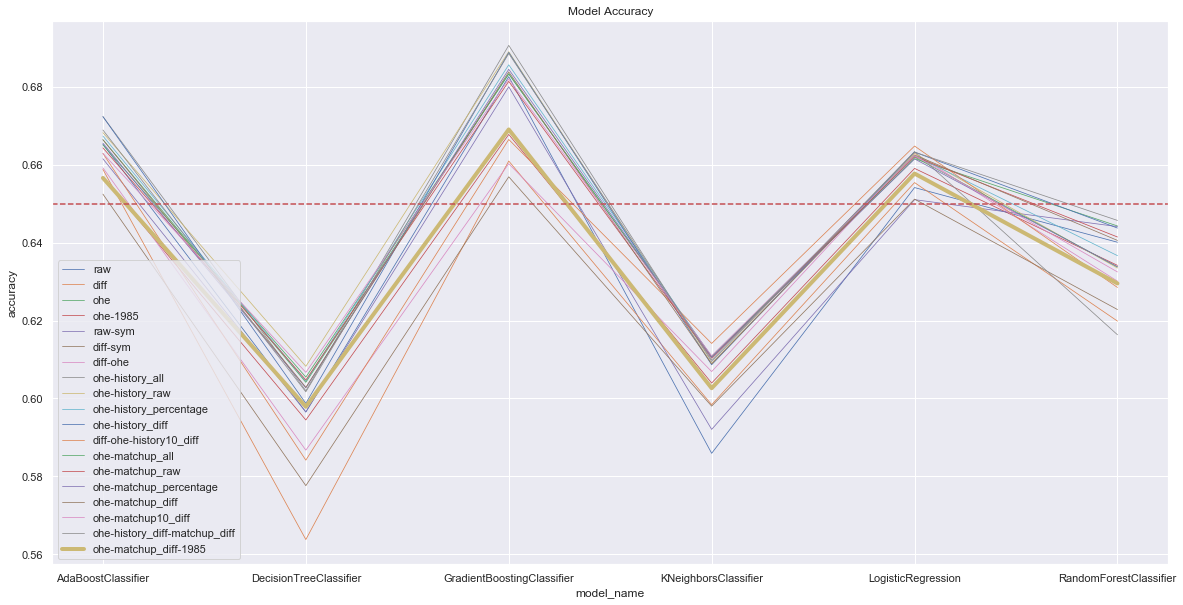

In [30]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

Best Model: GradientBoostingClassifier


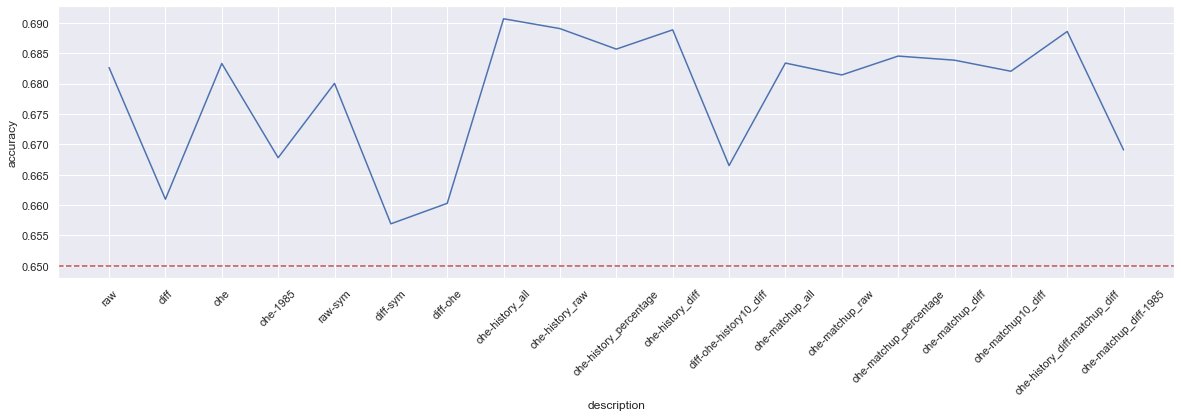

In [31]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')

dt_report = report[(report.model_name == best_model)]

f, a = plt.subplots(1, 1, figsize=(20, 5))
_ = sns.lineplot(x="description", y="accuracy", data=dt_report, ax=a, sort=False)
_ = a.axhline(0.65, ls='--', color='r')
_ = a.set_label(f"{best_model} Accuracy")
_ = plt.xticks(rotation=45)


In [32]:
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)


In [33]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

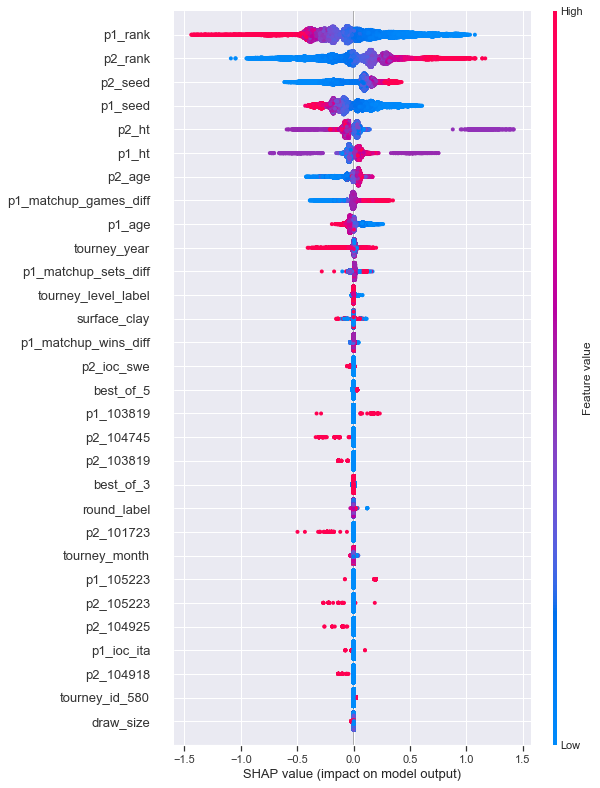

In [34]:
shap.summary_plot(shap_values, X_test, max_display=30)

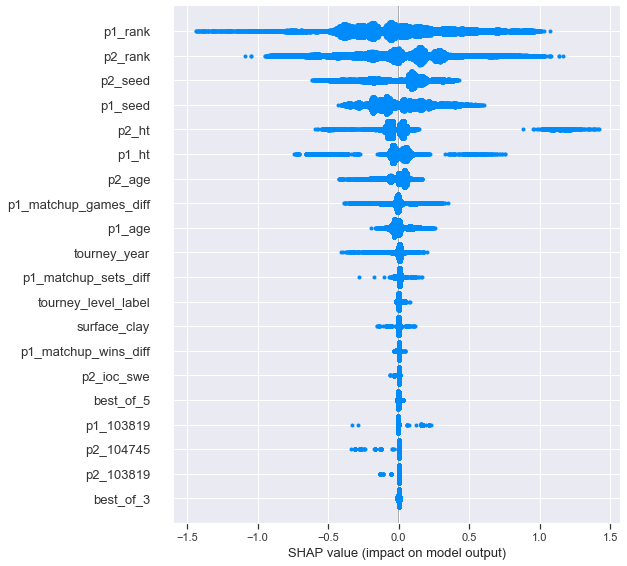

In [35]:
shap.summary_plot(shap_values, feature_names=X_test.columns, title="Feature Importance")

In [36]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-21 05:59
